# Week 1

## Overview

As explained in the [*Before week 1* notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/How_To_Take_This_Class.ipynb?flush_cache=true), each week of this class is an IPython notebook like this one. **_In order to follow the class, you simply start reading from the top_**, following the instructions.

**Hint**: And you can ask me - or any of the friendly Teaching Assistants - for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* As the zero'th item. Make sure that you're on top of Python. If you feel you need to refresh. **PLEASE GO TO THE** [Python refresher Notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/PythonBootcamp.ipynb?flush_cache=true) and work through it before proceeding.
* And, if you haven't already, also watch the video in the ["How we do things" Notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/How_To_Take_This_Class.ipynb?flush_cache=true). Understanding what's going on, will save you a lot of pain and suffering later on in the course.

Ok. And now for the actual lecture

* First, we talk a bit about APIs and how they work.
* Next we'll dip our toes in the waters of Network Science, with a bit of lecturing and reading.
* Thirdly, and finally, we'll be getting our hands dirty getting to know the awesome Network Analysis package `NetworkX`.

## Part 1: What is an API?

As a little check that you're on top of Python, let's get started with a quick overview of APIs. And don't worry, the work you do here will be relevant later, I promise.
> 
> **_Video lecture_**: Click below to watch it on YouTube.
> 
**NOTE**: That this video is made for Python 2. There are a few things that won't work in Python 3. To help smooth things over until I update the video, **[here](https://github.com/SocialComplexityLab/socialgraphs2024/blob/main/files/API_check.ipynb)** is an Python3 version of the notebook used in the video to help you out with the changes.

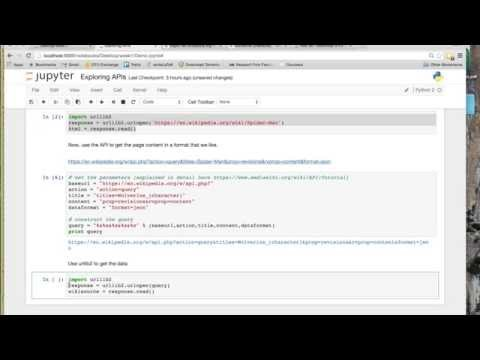

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("9l5zOfh0CRo", width=800, height=450)

It's time for you to get to work. Take a look at the two texts below - just to get a sense of a more technical description of how APIs work.

Again, this is a Python 2 video, so small changes may apply. This video will be updated soon. Hint: **[Here](https://github.com/SocialComplexityLab/socialgraphs2024/blob/main/files/API_check.ipynb)** is a Python3 version of the notebook used in the video that you can work from.


> _Reading_ (just skim): [Wikipedia page on APIs](https://en.wikipedia.org/wiki/Web_API)  
> _Reading_ (just skim): [Wikipedia page on REST for web services](https://en.wikipedia.org/wiki/Representational_state_transfer#Applied_to_web_services)
> 

Note that if you encounter a 403 error when trying to access Wikipedia, you might need a header as part of your request. One way of solving this could be something like this:

```python
import requests
url = # ... enter your favourite Wikipedia page here!
headers = {"User-Agent" : "MyWikipediaClient/1.0 (example@example.com)"} # just use this dict as-is.
response = requests.get(url, headers=headers)
print(f'Status code: {response.status_code}')
```

> *Exercise*: 
> * Explain in your own words: What is the the difference between the html page and the wiki-source?
* The HTML page is a structured webpage. the wiki-source variable containes the string (the whole html) from the web page.
> * What are the various parameters you can set for a query of the wikipedia api?
* You can set the action (usally query), title, content, and dataformat. 
> * Write your own little `notebook` to download wikipedia pages based on the video above. Download the source for your 4 favorite wikipedia pages.

<div class="alert alert-block alert-info">
You might feel tempted to use an LLM to answer the questions above. Don't! The goal of taking the class is to get smarter, and you won't get smarter if someone else does the work for you. So think! Write down your own thoughts. Then when you're done, you can use and LLM to make the answers better.
</div>

In [26]:
import urllib.request
import json

baseurl = "https://en.wikipedia.org/w/api.php?"
headers = {'User-Agent': 'Mozilla/5.0 (Jupyter Notebook) Educational project/1.0'}
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

titles = [
    "titles=Danilo_Gallinari", 
    "titles=Mouhamet_Diouf",
    "titles=Zach_Lavine",
    "titles=LaMelo_Ball"
]

for title in titles:
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    print("For the query: ", query, "\n")
    req = urllib.request.Request(query, headers=headers)
    wikiresponse = urllib.request.urlopen(req)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikijason = json.loads(wikitext)
    print(wikijason, end="\n\n")


For the query:  https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Danilo_Gallinari&format=json 

{'batchcomplete': '', 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application.'}, 'revisions': {'*': 'Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}}, 'query': {'normalized': [{'from': 'Danilo_Gallinari', 'to': 'Danilo Gallinari'}], 'pages': {'9274504': {'pageid': 9274504, 'ns': 0, 'title': 'Danilo Gallinari', 'revisions': [{'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': '{{Short description|Italian basketball player (born 1988)}}\n{{use dmy dates|date=November 2021}}

# Part 2: Basic description of networks

Now let's get to some some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Start by watching the "History of Networks" below


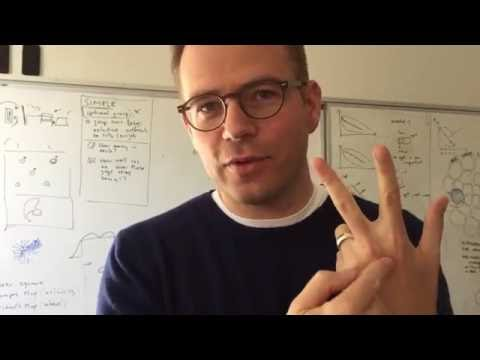

In [3]:
YouTubeVideo("qjM9yMarl70", width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://networksciencebook.com). If you like paper books, the DTU Bookstore has good deals, I am told.
> 
> * Read chapter 1\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in an IPython notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
>   * The router network where the routers are the nodes and the physical connections between them are the links.
>   * The social network where each node is a person and the links are the firendship.
>   * The power grid network with the towers as nodes and cables as links.
> * Tell us of the network you are personally most interested in (a fourth one). Address the following questions:
>   * The network I am most intersted in is the type of social network for example around the world of F1 drivers and how a new seat is assigned.
>   * What are its nodes and links? 
>       * The links represent the friendship/connection between teams principal and drives while nodes are the drivers and team principals.
>   * How large is it? 
>       * It is 20 drivers plus 10 reserve drivers plus 10 team principals plus an hard to define numeber of drivers form F2, F3 and minor racing series.
>   * Can be mapped out? 
>       * Yes, it could be mapped out if we find a way to make evaluate friendship in a mathmatical way.
>   * Does it evolve over time? 
>       * Yes, as human connections evolve over time.
>   * Are there processes occurring ON the network? (information spreading, for example). 
>       * Yes there are processes, from conferences to meetings between the people involved. 
>   * Why do you care about it? 
>       * I like the F1 world and think it will be cool to have such a network to try and predict new driver seats.
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
>   * It's a science that can be applied to many things. I think it's really interesting how we applied it to predict the spread of COVID-19 and the medical field is big field where this science can make a huge impact as also described in the chapter one of the book. 

<div class="alert alert-block alert-info">
Once again, you might feel tempted to use an LLM to answer the questions above. Don't do it! 
    
The goal of taking the class is to get learn, and you won't learn a thing if a machine does the work for you. It's OK to first down your own thoughts. Then, when you're done, you can use and LLM to improve your answers.
</div>

# Part 3: The awesome `NetworkX` library

In case it wasn't clear by now, this class is about YOU analyzing networks. And it wouldn't be right to start the first lecture without playing a little bit with network analysis (there will be much more on this in the following lectures). So here goes...

`NetworkX` should already be installed as part of your _Anaconda_ Python distribution. But you don't know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the next exercise is about

> *Exercises*:
> 
> * Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). The goal of this exercise is to create your own Notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense. 

There will be much more on NetworkX next time.

In [28]:
import networkx as nx

In [ ]:
G = nx.Graph()

# add a node
G.add_node(1)

# add multiple nodes
G.add_nodes_from([2, 3])

# add nodes with their attributes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [ ]:
H = nx.path_graph(10)
G.add_nodes_from(H) # G has the nodes of H

# the graph H is now a node of G
G.add_node(H)

In [ ]:
# add edges
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)

In [32]:
G.clear()

In [33]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [34]:
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


In [35]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [36]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1


[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [37]:
print(G.edges([2, 'm']))
print(G.degree([2, 3]))


[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


In [38]:
G.remove_node(2)
G.remove_nodes_from("spam")

In [42]:
G.add_edge(1, 3)
G.remove_edge(1, 3)
list(G.edges)


[(1, 2)]

In [44]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [45]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [48]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

In [55]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1] to access elements in a graph
print(G[1][2]["color"])  # get edge attribute
print(G.edges[1, 2])
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

yellow
{'color': 'yellow'}


{'color': 'red'}

In [56]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [57]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [58]:
# add attributes to a graph, node or edge
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [59]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [62]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [63]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [65]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

In [ ]:
# working with directed graphs
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [70]:
DG.degree(1, weight='weight')

1.25

In [71]:
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

[2]
[2]


In [72]:
# multigraphs
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [73]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [74]:
# analyzing graphs
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [75]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [76]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [77]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

In [79]:
# drawing graphs
import matplotlib.pyplot as plt

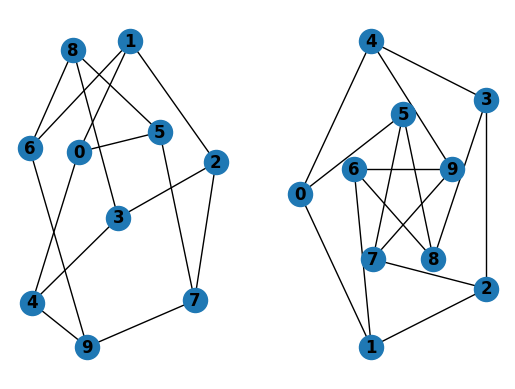

In [80]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')